# Linear Classifier from Scratch using TensorFlow
Knowing about tensors, variables, tensor operations and how to compute gradients is enough to build any machine learning model based on gradient descent.
## Goal: 
To implement linear classifier from scratch in TensorFlow

## Intro:
* This notebook is not about performance or competitions.
* It is an educational walkthrough of how gradients, weights, and bias work
in a simple linear classifier using TensorFlow’s GradientTape.

In [11]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"  # 0 = hide all, 1 = hide INFO, 2 = hide WARNING, 3 = hide ERROR

## step 1
Generating two classes of random points in a 2D plane. Generating each class of points by drawing their coordinates from a random distribution with specific covariance matrix and a specific mean.

The covariance matrix describes the shape of the point cloud and the mean describes its position on plane. Reuse of same covariance matrix will be done for both point clouds but two different mean values will he used, bascically the point clouds wil have same shape but different positions.

In [12]:
import numpy as np 

num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal( #multivariate_normal: generalizatio of 1D normal distribution in heigher dimension
    mean = [0,3],
    cov = [[1,0.5],[0.5,1]], #oval like point cloud
    size = num_samples_per_class
)
positive_samples = np.random.multivariate_normal(
    mean = [3,0],
    cov = [[1,0.5],[0.5,1]],
    size = num_samples_per_class
)

## step 2
negative_samples and positive_samples are two arrays of size (1000,2), combining them to form a single array of size (2000,2)....

In [13]:
inputs = np.vstack((negative_samples,positive_samples)).astype(np.float32) #np.vstack: combines a sequence of arrays along the first axis (axis 0)

## step 3
generating the corrosponding targets (0 and 1), an array of zeros and ones of shape (2000,1), where targets[i,0] is 0 if inputs[i] belong to class 0 and same for 1

In [14]:
targets = np.vstack((np.zeros((num_samples_per_class,1),dtype='float32'),
                    np.ones((num_samples_per_class,1),dtype='float32')))

## step 4 
plotting the two point classes 

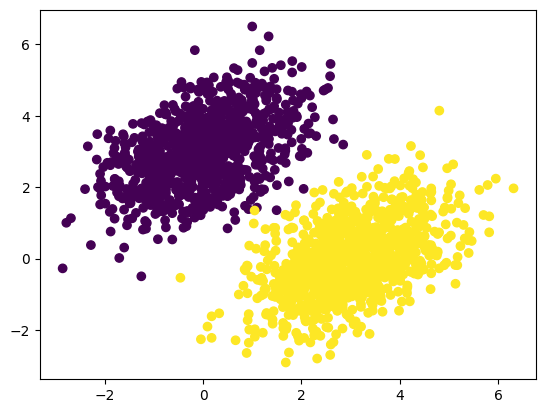

In [15]:
import matplotlib.pyplot as plt 
plt.scatter(inputs[:,0],inputs[:,1],c=targets[:,0])
plt.show()

## step 5
creating the linear classifier variables, W and b, initialized with random values and with zeros respectively

In [16]:
import tensorflow as tf
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value = tf.random.uniform(shape=(input_dim,output_dim)))
b = tf.Variable(initial_value = tf.zeros(shape=(output_dim,)))

## step 6
The forward pass

Prediction value is prediction = [[w1], [w2]] • [x,y] + b = w1 * x + w2 * y + b.

In [17]:
def model(inputs):
    return tf.matmul(inputs,W) + b 

## step 7
Loss function

The mean squared error loss function.

Squared loss is used here for simplicity, even though cross-entropy is more common for classification.

In [18]:
def square_loss(targets,predictions):
    per_sample_losses = tf.square(targets-predictions)
    return tf.reduce_mean(per_sample_losses) #we need to avg these per-sample loss scores into a single scaler loss value: this is done by reduce_mean  

## step 8
The training step function

In [19]:
learning_rate = 0.1

def training_step(inputs,targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)  #forward pass inside a gratient tape scope
        loss = square_loss(targets,predictions)
    grad_loss_W, grad_loss_b = tape.gradient(loss,[W,b]) #retrive the gradient of the loss with regard to weights
    W.assign_sub(grad_loss_W * learning_rate) #updating the weights
    b.assign_sub(grad_loss_b * learning_rate)
    return loss

* We’ll do batch training instead of mini-batch training: we’ll run each training
step (gradient computation and weight update) for all the data, rather than iterate over
the data in small batches.
* This means that each training step will take
much longer to run, since we’ll compute the forward pass and the gradients for 2,000
samples at once.
* Each gradient update will be much more effective
at reducing the loss on the training data, since it will encompass information from all
training samples instead of, say, only 128 random samples.
* We will need many fewer steps of training, and we should use a larger learning rate than we would typically
use for mini-batch training.

## step 9
The batch training loop

In [20]:
for step in range(70):
    loss = training_step(inputs,targets)
    print(f"Loss at step {step}: {loss: .4f}")

Loss at step 0:  2.1064
Loss at step 1:  0.3612
Loss at step 2:  0.1469
Loss at step 3:  0.1133
Loss at step 4:  0.1030
Loss at step 5:  0.0961
Loss at step 6:  0.0902
Loss at step 7:  0.0848
Loss at step 8:  0.0798
Loss at step 9:  0.0753
Loss at step 10:  0.0711
Loss at step 11:  0.0673
Loss at step 12:  0.0638
Loss at step 13:  0.0606
Loss at step 14:  0.0577
Loss at step 15:  0.0550
Loss at step 16:  0.0525
Loss at step 17:  0.0502
Loss at step 18:  0.0482
Loss at step 19:  0.0463
Loss at step 20:  0.0445
Loss at step 21:  0.0429
Loss at step 22:  0.0415
Loss at step 23:  0.0401
Loss at step 24:  0.0389
Loss at step 25:  0.0378
Loss at step 26:  0.0367
Loss at step 27:  0.0358
Loss at step 28:  0.0349
Loss at step 29:  0.0341
Loss at step 30:  0.0334
Loss at step 31:  0.0327
Loss at step 32:  0.0321
Loss at step 33:  0.0316
Loss at step 34:  0.0310
Loss at step 35:  0.0306
Loss at step 36:  0.0301
Loss at step 37:  0.0297
Loss at step 38:  0.0294
Loss at step 39:  0.0290
Loss at st

After around 70 steps the loss stabelized around 0.025.

Let’s plot how our linear model classifies the training data points.

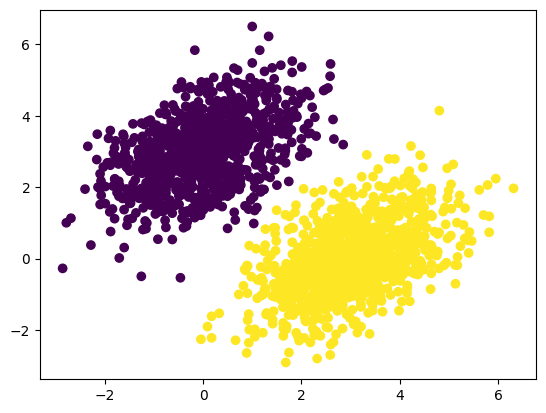

In [21]:
predictions = model(inputs)
plt.scatter(inputs[:,0],inputs[:,1],c=predictions[:,0] > 0.5) #input point will be classified as “0” if its prediction value is below 0.5, and as “1” if it is above 0.5 
plt.show()

* prediction value for a given point [x, y] is simply prediction == [[w1], [w2]] • [x, y] + b == w1 * x + w2 * y + b
* class 0 is defined as w1 * x + w2 * y + b < 0.5, and class 1 is defined as w1 * x + w2 * y + b > 0.5
* notice that what you’re looking at is really the equation of a line in the 2D plane: w1 * x + w2 * y + b = 0.5
* Above the line is class 1, and below the line is class 0.

line equations in the format y = a * x + b; in the same format, our line becomes y = - w1 / w2 * x + (0.5 - b) / w2. Lets plot this line:

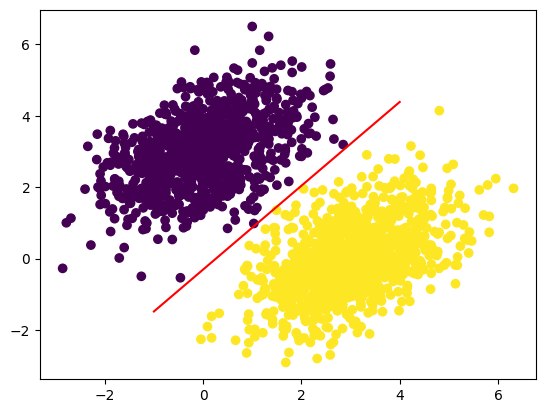

In [24]:
x = np.linspace(-1,4,100) #generating 100 regularly spaced numbers between -1 and 4 which we will use to plot our line 
y = - W[0] / W[1] * x + (0.5 - b) / W[1] #Our line equation
plt.plot(x,y,'-r') #plot the line ('-r' means plot it as a red line)
plt.scatter(inputs[:,0],inputs[:,1],c=predictions[:,0] > 0.5)
plt.show() #our model visualized as a line

A linear classifier is all about: finding the parameters of a line (or, in
higher-dimensional spaces, a hyperplane) neatly separating two classes of data. 